In [30]:
import numpy as np
import pandas as pd
import plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
import plotly.graph_objects as go
init_notebook_mode( connected = True)
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn

In [31]:
df = pd.read_csv('train.csv')
df.shape

(404290, 6)

In [32]:
df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  
0  What is the step by step guide to invest in sh...             0  
1  What would happen if the Indian government sto...             0  
2  How can Internet speed be increased by hacking...             0  
3  Find the remainder when [math]23^{24}[/math] i...             0  
4            Which fish would survive in salt water?             0

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [34]:
#missing null value
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
#distribution of duplicate and non-duplicate pair of questions
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts() / df['is_duplicate'].count()) * 100)

x_axis = [ 'is_duplicate', 'is_not_duplicate']
y_axis = df['is_duplicate'].value_counts()

fig = go.Figure([go.Bar(x = x_axis, y = y_axis)])
fig.show()

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


In [37]:
#repeated questions.

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print("Number of unique questions", np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [38]:
fig = go.Figure(data = [go.Histogram(x = qid.value_counts().values)])
fig.show()

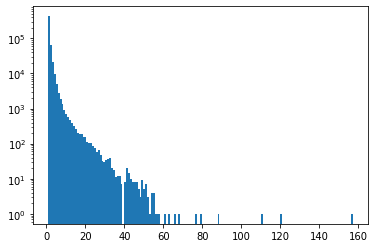

In [40]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale('log')
plt.show()

Taking a small data frame as the actuall data to big.

In [41]:
new_df = df.sample(30000)
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [44]:
ques_df = new_df[['question1', 'question2']]
ques_df.head()

question1  \
246235  Which books should I read to know about Swami ...   
215629                                   Is wlci reputed?   
302840  What is the place of moral philosophy/ethics i...   
88964   What types of patient data are good for predic...   
273056  Will Urjit Patel be a right RBI governor for I...   

                                                question2  
246235  What are the good books one can read to know m...  
215629  What is the exit load on redemption of liquid ...  
302840  Should Clinton drop out and allow Sanders to r...  
88964   What types of patient data are good for predic...  
273056  What is your view on Urjit Patel, the new RBI ...

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
#merge text
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [47]:
#converting the vector list to new data frame.
temp_df1 = pd.DataFrame(q1_arr, index = ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [48]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [49]:
temp_df.head()

0  1  2  3  4  5  6  7  8  9  ...  2991  2992  2993  2994  2995  2996  \
246235  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
215629  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
302840  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
88964   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0     0     0   
273056  0  0  0  0  0  0  0  0  0  0  ...     0     0     1     0     0     0   

        2997  2998  2999  is_duplicate  
246235     0     0     0             1  
215629     0     0     0             0  
302840     0     0     0             0  
88964      0     0     0             0  
273056     0     0     0             0  

[5 rows x 6001 columns]

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_df.iloc[:, 0:-1].values, temp_df.iloc[:,-1].values, test_size = 0.2, random_state = 2 ) 

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7385

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier() 
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test, y_pred)